<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/CIFAR10_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_CNN%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 참고 자료
[04. CNN(Convolution Neural Networks)](https://wikidocs.net/227547)

<br>

# 1. 데이터셋 로드 및 전처리
- CIFAR10 데이터셋 로드
- train 데이터셋에서 20%를 검증 데이터로 분리
- 데이터 스케일링(0 ~ 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

print("전체 학습 데이터:", x_train_full.shape, "레이블:", y_train_full.shape)
print("학습 데이터:", x_train.shape, "레이블:", y_train.shape)
print("검증 데이터:", x_val.shape, "레이블:", y_val.shape)
print("테스트 데이터:", x_test.shape, "레이블:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [2]:
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

<br>

# 2. CNN 모델 구성
- Convolution, Pooling, Flatten, Dense 레이어 모두 이용

In [3]:
from tensorflow.keras import models, layers

model = models.Sequential()

# Convolutional Layer + Pooling Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer + Pooling Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten -> 2D 출력을 1D로 변환하는 작업
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# output layer
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

<br>

# 3. 모델 컴파일

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<br>

# 4. 모델 학습
- ModelCheckpoint, EarlyStopping 모두 사용

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('best_model.h5.keras', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train,y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 101ms/step - accuracy: 0.3058 - loss: 1.8733 - val_accuracy: 0.4468 - val_loss: 1.5229
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5308 - loss: 1.3157 - val_accuracy: 0.5591 - val_loss: 1.2244
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 97ms/step - accuracy: 0.5894 - loss: 1.1560 - val_accuracy: 0.6219 - val_loss: 1.0733
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 90ms/step - accuracy: 0.6278 - loss: 1.0531 - val_accuracy: 0.6119 - val_loss: 1.1121
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.6608 - loss: 0.9636 - val_accuracy: 0.6608 - val_loss: 0.9774
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 101ms/step - accuracy: 0.6854 - loss: 0.8851 - val_accuracy: 0.6602 - val_loss: 0.9681
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 90ms/step - accuracy: 0.7045 - loss: 0.8385 - val_accuracy: 0.6695 - val_loss: 0.9517
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.7232 - loss: 0.7919 

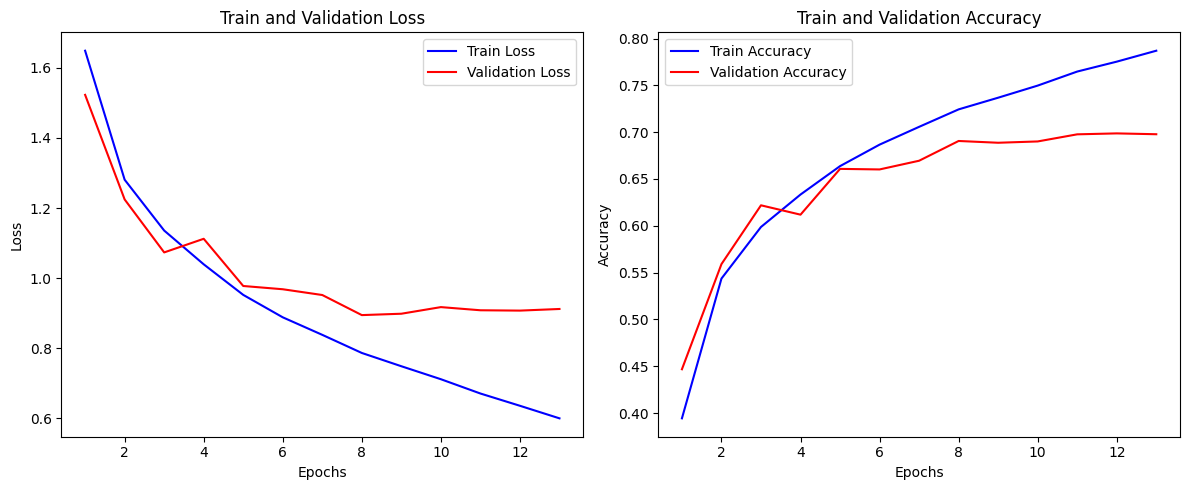

In [8]:
# 학습 곡선 시각화
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<br>

# 5. 모델 평가 및 예측

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6905 - loss: 0.9080
Test Loss: 0.9123725295066833, Test Accuracy: 0.6894000172615051
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


<br>

# 6. 예측 결과 시각화
- 예측값 vs 실제값

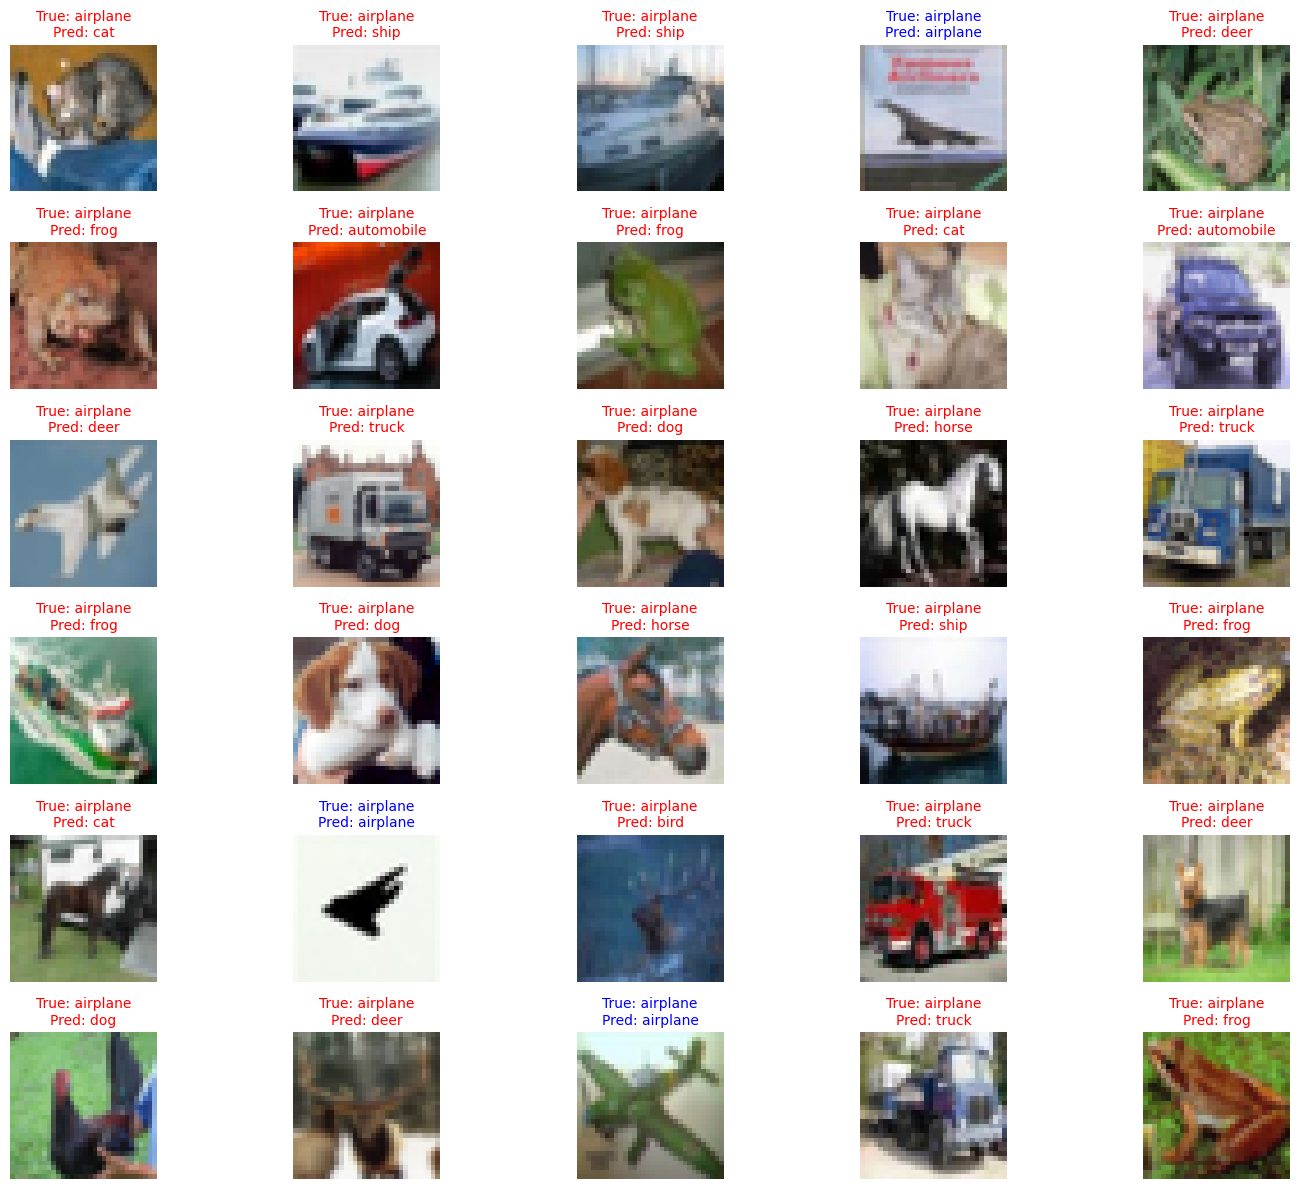

In [7]:
y_true = np.argmax(y_test, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_samples = 30

plt.figure(figsize=(15, 12))

for i in range(num_samples):
    plt.subplot(6, 5, i+1)
    img = x_test[i]
    plt.imshow(img)

    if y_true[i] == y_pred_class[i]:
        color = 'blue'
    else:
        color = 'red'

    title = f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_class[i]]}"
    title_obj = plt.title(title, fontsize=10)
    title_obj.set_color(color)

    plt.axis('off')

plt.tight_layout()
plt.show()

<br>

# 7. CNN 모델 재구성
- 배치 정규화, 드롭아웃까지 추가(25%)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Residual Block 정의
def residual_block(inputs, filters):
    x = layers.Conv2D(filters, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), padding="same")(x)
    x = layers.BatchNormalization()(x)

    # 입력 채널과 출력 채널이 다르면 1x1 합성곱으로 맞춤
    if inputs.shape[-1] != filters:
        inputs = layers.Conv2D(filters, (1, 1), padding="same")(inputs)

    # 입력 텐서와 출력 텐서를 더함
    x = layers.Add()([x, inputs])
    x = layers.Activation("relu")(x)
    return x


# 모델 정의
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = residual_block(x, 64)
x = residual_block(x, 64)
x = layers.MaxPooling2D((2, 2))(x)

x = residual_block(x, 128)
x = residual_block(x, 128)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

# 모델 요약
model.summary()

# 모델 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 콜백 설정
checkpoint_cb = ModelCheckpoint('best_model.h5.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True, monitor='val_accuracy', mode='max')
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor='val_accuracy', mode='max')

# 모델 학습
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb])

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 32, 32, 64)     │          1,792 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 32, 32, 64)     │            256 │ conv2d_60[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_19          │ (None, 16, 16, 64)     │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ max_pooling2d_19[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_58    │ (None, 16, 16, 64)     │            256 │ conv2d_61[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_59    │ (None, 16, 16, 64)     │            256 │ conv2d_62[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_23 (Add)              │ (None, 16, 16, 64)     │              0 │ batch_normalization_5… │
│                           │                        │                │ max_pooling2d_19[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_22             │ (None, 16, 16, 64)     │              0 │ add_23[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ activation_22[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_60    │ (None, 16, 16, 64)     │            256 │ conv2d_63[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_61    │ (None, 16, 16, 64)     │            256 │ conv2d_64[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 16, 16, 64)     │              0 │ batch_normalization_6… │
│                      

 Total params: 1,734,026 (6.61 MB)

 Trainable params: 1,731,338 (6.60 MB)

 Non-trainable params: 2,688 (10.50 KB)

Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 712s 1s/step - accuracy: 0.3711 - loss: 1.8809 - val_accuracy: 0.4180 - val_loss: 1.7776 - learning_rate: 0.0010
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 706s 1s/step - accuracy: 0.5852 - loss: 1.1734 - val_accuracy: 0.5867 - val_loss: 1.2929 - learning_rate: 0.0010
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 674s 1s/step - accuracy: 0.6631 - loss: 0.9620 - val_accuracy: 0.5440 - val_loss: 1.3221 - learning_rate: 0.0010
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 665s 1s/step - accuracy: 0.7025 - loss: 0.8567 - val_accuracy: 0.6162 - val_loss: 1.1684 - learning_rate: 0.0010
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.7345 - loss: 0.7629 - val_accuracy: 0.7275 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 684s 1s/step - accuracy: 0.7562 - loss: 0.7069 - val_accuracy: 0.7470 - val_loss: 0.7619 - learning_rate: 0.0010
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 657s 1s/step - accuracy: 0.7752 - loss: 0.

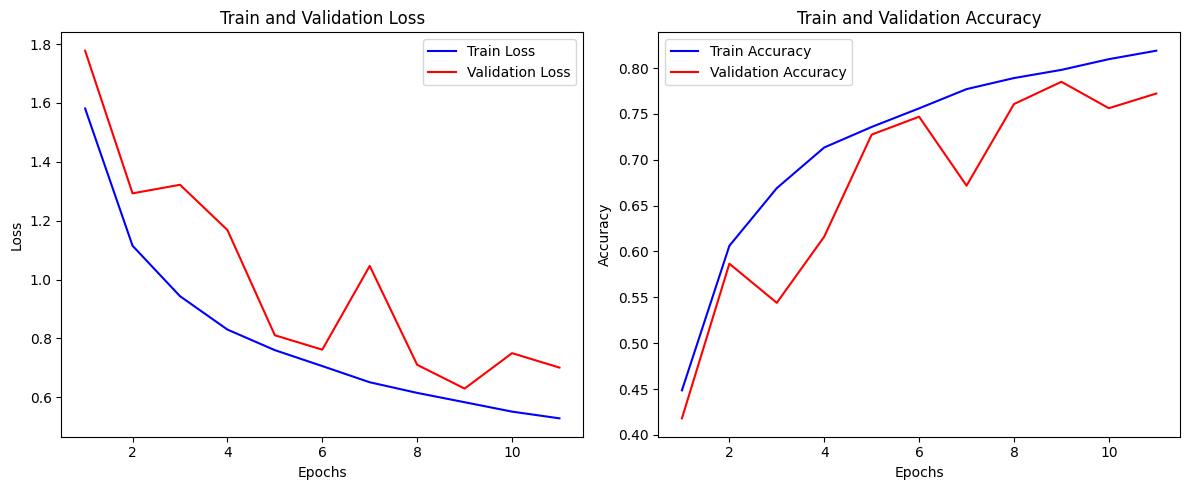

In [16]:
# 학습 곡선 시각화
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<br>

# 결과 분석(Test accuracy 기준)
- 기본 모델 : 0.45419999957084656
- CNN 기본 적용 모델 : 0.6894000172615051
- CNN 재조정 모델 : 0.779699981212616

<br>

# 회고
노드 12의 마지막 부분에서 "이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다."라는 내용을 보고 이 프로젝트를 디벨롭해왔습니다..!
<br>
이미지 데이터에는 CNN 모델이 더 적합하니, 잘 알지 못하더라도 한번 적용해보고 싶었어요.
<br>
그래서, 간단히 내용들을 찾아보고 이해한 선에서 모델에 적용시켜 봤습니다.
<br>
<br>
결론적으로 CNN에 대해서 더 이해해야하기 때문에 더 유의미한 수치를 내지는 못했지만, 이전의 일반 모델보다는 확실히 이미지 데이터에 강한 모델을 사용하여 더 나은 정확도를 낼 수 있었다는 것으로 우선 프로젝트를 마무리하려고 합니다.
<br>
더 많이 배워서, DL도 잘 이해하고 싶어요😄

<br>